In [3]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Robotux\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install mysql-connector-python

You should consider upgrading via the 'C:\Users\Robotux\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import mysql.connector 
import json

with open("credentials.json", 'r') as fr:
    credentials = json.load(fr)

mydb = mysql.connector.connect(
    host="localhost", # IP address
    port="3306", # 3317
    user=credentials['user'],
    password=credentials['pass']
)

cursor = mydb.cursor()
cursor.execute('USE sakila')
df = pd.read_sql('SELECT * FROM actor', con=mydb)
df

C:\Users\Robotux\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33
...,...,...,...,...
195,196,BELA,WALKEN,2006-02-15 04:34:33
196,197,REESE,WEST,2006-02-15 04:34:33
197,198,MARY,KEITEL,2006-02-15 04:34:33
198,199,JULIA,FAWCETT,2006-02-15 04:34:33


In [22]:
df = pd.read_csv('wine_cleaned.csv', index_col=0)
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,naujas_stulpelis,descrption_len,descrption_words,place
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,227,38,Portugal Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,12.18,186,28,US Oregon
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,11.31,199,33,US Michigan
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,56.55,249,41,US Oregon
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,13.05,261,42,Spain Northern Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),25.20,227,34,Germany Mosel
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,67.50,233,38,US Oregon
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,27.00,225,43,France Alsace
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,28.80,216,40,France Alsace


## rename

In [11]:
df = df.rename( columns={'taster_name': 'Tester', 'taster_twitter_handle': 'twitter_acc'} )
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,Tester,twitter_acc,title,variety,winery,naujas_stulpelis,descrption_len,descrption_words,place
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,227,38,Portugal Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,12.18,186,28,US Oregon


In [16]:
df.rename( index={ 1: 'first', 2: 'second' } )

,country,description,designation,points,price,province,region_1,region_2,Tester,twitter_acc,title,variety,winery,naujas_stulpelis,descrption_len,descrption_words,place
first,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,227,38,Portugal Douro
second,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,12.18,186,28,US Oregon
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,11.31,199,33,US Michigan
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,56.55,249,41,US Oregon
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,13.05,261,42,Spain Northern Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),25.20,227,34,Germany Mosel
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,67.50,233,38,US Oregon
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,27.00,225,43,France Alsace
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,28.80,216,40,France Alsace


## dtypes

In [17]:
df['points'].dtype

dtype('int64')

In [23]:
print ( df['country'].dtype )

object


In [24]:
df['price'].dtype

dtype('float64')

In [29]:
print (df['points'].astype('float64') ) 
df['points'] = df['points'].astype('float64') 

1         87.0
2         87.0
3         87.0
4         87.0
5         87.0
          ... 
129966    90.0
129967    90.0
129968    90.0
129969    90.0
129970    90.0
Name: points, Length: 111538, dtype: float64


In [30]:
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,naujas_stulpelis,descrption_len,descrption_words,place
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,227,38,Portugal Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,12.18,186,28,US Oregon
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,11.31,199,33,US Michigan
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,56.55,249,41,US Oregon
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,13.05,261,42,Spain Northern Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90.0,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),25.20,227,34,Germany Mosel
129967,US,Citation is given as much as a decade of bottl...,NaN,90.0,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,67.50,233,38,US Oregon
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90.0,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,27.00,225,43,France Alsace
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90.0,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,28.80,216,40,France Alsace


In [32]:
df[ df['region_2'].isna() ]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,naujas_stulpelis,descrption_len,descrption_words,place
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,227,38,Portugal Douro
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,11.31,199,33,US Michigan
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,13.05,261,42,Spain Northern Spain
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87.0,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,13.92,181,31,Italy Sicily & Sardinia
7,France,This dry and restrained wine offers spice in p...,NaN,87.0,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,20.88,122,21,France Alsace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90.0,28.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann,25.20,211,32,France Alsace
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90.0,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),25.20,227,34,Germany Mosel
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90.0,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,27.00,225,43,France Alsace
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90.0,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,28.80,216,40,France Alsace


In [33]:
df['region_2'].fillna('Not specified')

1             Not specified
2         Willamette Valley
3             Not specified
4         Willamette Valley
5             Not specified
                ...        
129966        Not specified
129967         Oregon Other
129968        Not specified
129969        Not specified
129970        Not specified
Name: region_2, Length: 111538, dtype: object

In [35]:
df['region_2'] = df['region_2'].fillna('Not specified')
# df['region_2'].fillna('Not specified', inplace=True) # Same as above
regions_2 = df['region_2'].fillna('Not specified')
regions_2

1             Not specified
2         Willamette Valley
3             Not specified
4         Willamette Valley
5             Not specified
                ...        
129966        Not specified
129967         Oregon Other
129968        Not specified
129969        Not specified
129970        Not specified
Name: region_2, Length: 111538, dtype: object

In [53]:
df.head(6)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,naujas_stulpelis,descrption_len,descrption_words,place
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,Not specified,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,13.05,227,38,Portugal Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,12.18,186,28,US Oregon
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Not specified,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,11.31,199,33,US Michigan
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,56.55,249,41,US Oregon
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0,15.0,Northern Spain,Navarra,Not specified,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,13.05,261,42,Spain Northern Spain
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87.0,16.0,Sicily & Sardinia,Vittoria,Not specified,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,13.92,181,31,Italy Sicily & Sardinia


In [54]:
df['taster_twitter_handle'].replace('@wineschach', '@me')

1          @vossroger
2         @paulgwine 
3                 NaN
4         @paulgwine 
5                 @me
             ...     
129966            NaN
129967    @paulgwine 
129968     @vossroger
129969     @vossroger
129970     @vossroger
Name: taster_twitter_handle, Length: 111538, dtype: object

## Concat

In [62]:
ca_videos = pd.read_csv('CAvideos.csv')
print (ca_videos.shape)
ca_videos.head(2)

(40881, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...


In [61]:
gb_videos = pd.read_csv('GBvideos.csv')
print (gb_videos.shape)
gb_videos.head(2)

(38916, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...


In [60]:
pd.concat( [ca_videos, gb_videos] )

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...


## Join

In [63]:
ca_videos.join( gb_videos )

ValueError: columns overlap but no suffix specified: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [64]:
ca_videos.join( gb_videos, lsuffix='_left', rsuffix='_right' )

,video_id_left,trending_date_left,title_left,channel_title_left,category_id_left,publish_time_left,tags_left,views_left,likes_left,dislikes_left,...,tags_right,views_right,likes_right,dislikes_right,comment_count_right,thumbnail_link_right,comments_disabled_right,ratings_disabled_right,video_error_or_removed_right,description_right
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,"christmas|""john lewis christmas""|""john lewis""|...",7224515.0,55681.0,10247.0,9479.0,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.0,25561.0,2294.0,2757.0,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787420.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.0,193.0,12.0,37.0,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,[none],9815.0,30.0,2.0,30.0,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5'],
                   'B': ['B0', 'B1', 'B2', 'B3', 'B4', 'B5']})
df_1

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
4,K4,A4,B4
5,K5,A5,B5


In [70]:
df_2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                    'C': ['C0', 'C1', 'C2'],
                    'B': ['B0', 'B1', 'B2']})
df_2

,key,C,B
0,K0,C0,B0
1,K1,C1,B1
2,K2,C2,B2


In [77]:
df_1.join(other=df_2, lsuffix='_l', rsuffix='_r')

,key_l,A,B_l,key_r,C,B_r
0,K0,A0,B0,K0,C0,B0
1,K1,A1,B1,K1,C1,B1
2,K2,A2,B2,K2,C2,B2
3,K3,A3,B3,NaN,NaN,NaN
4,K4,A4,B4,NaN,NaN,NaN
5,K5,A5,B5,NaN,NaN,NaN


In [76]:
df_1.join(other=df_2.set_index('key'), on='key', lsuffix='_l', rsuffix='_r')

,key,A,B_l,C,B_r
0,K0,A0,B0,C0,B0
1,K1,A1,B1,C1,B1
2,K2,A2,B2,C2,B2
3,K3,A3,B3,NaN,NaN
4,K4,A4,B4,NaN,NaN
5,K5,A5,B5,NaN,NaN


In [78]:
df_1.join(other=df_2.set_index('key'), on='key', how='inner', lsuffix='_l', rsuffix='_r')

,key,A,B_l,C,B_r
0,K0,A0,B0,C0,B0
1,K1,A1,B1,C1,B1
2,K2,A2,B2,C2,B2


## Merge

In [81]:
df_1.merge(df_2, on='key', how='left', suffixes=('_left', '_right' ) )

,key,A,B_left,C,B_right
0,K0,A0,B0,C0,B0
1,K1,A1,B1,C1,B1
2,K2,A2,B2,C2,B2
3,K3,A3,B3,NaN,NaN
4,K4,A4,B4,NaN,NaN
5,K5,A5,B5,NaN,NaN


In [83]:
ca_videos.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...


In [88]:
grouped = ca_videos.groupby(['channel_title', 'ratings_disabled']).sum()
grouped

,,category_id,views,likes,dislikes,comment_count,comments_disabled,video_error_or_removed
channel_title,ratings_disabled,,,,,,,
#AndresSTyle,False,66,1330191,16384,468,1865,0,0
#Mind Warehouse,False,918,39464664,536411,94787,336485,0,0
#SeekingTheTruth,False,25,119011,3277,176,1066,0,0
* Martyna *,False,72,44973,524,13,263,0,0
- 欢迎订阅 -浙江卫视【奔跑吧】官方频道,False,864,48769105,345378,38594,125125,0,0
...,...,...,...,...,...,...,...,...
창조영감클럽,False,22,75953,307,60,64,0,0
타우TV,False,28,471919,4160,222,1000,0,0
포스트쉐어,False,24,1658045,5150,611,2003,0,0


In [102]:
grouped.loc[ ( slice(None), True ), : ] # [ (index_1 values, index_2 value), columns ]

,,category_id,views,likes,dislikes,comment_count,comments_disabled,video_error_or_removed
channel_title,ratings_disabled,,,,,,,
5 News,True,75,362795,0,0,0,3,0
AresPromo,True,840,12716522,0,0,39109,0,0
BBC Persian,True,50,19028,0,0,0,2,0
Bangtan Subs,True,44,223448,0,0,2147,0,0
BeatFilms,True,50,1377514,0,0,421,0,0
...,...,...,...,...,...,...,...,...
优酷,True,672,1017576,0,0,3336,0,0
新聞深喉嚨,True,825,5149540,0,0,44803,0,0
日清食品グループ公式チャンネル,True,72,2105781,0,0,0,3,0


In [101]:
grouped.loc[ ( 'BeatFilms', True ):('Game Of Thrones', True), : ] 

,,category_id,views,likes,dislikes,comment_count,comments_disabled,video_error_or_removed
channel_title,ratings_disabled,,,,,,,
BeatFilms,True,50,1377514,0,0,421,0,0
Beats 1 Radio,False,50,7171679,190704,13965,50341,0,0
Beats 1 on Apple Music,False,10,469187,15522,678,2667,0,0
Beatz and Bluntz,False,10,542436,3885,382,727,0,0
Bebe Rexha,False,30,8513495,141649,3611,6841,0,0
...,...,...,...,...,...,...,...,...
GalacticFusion,False,60,3471373,104880,1526,5888,0,0
Game Croix,False,60,448204,10389,199,206,0,0
Game Informer,False,20,289489,8906,95,2189,0,0


# Plots

## Pandas plots

In [103]:
import numpy as np

In [105]:
x = np.linspace(0,10,30)
print (x)

[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]


In [106]:
y = x * 2
z = x ** 2

In [110]:
df = pd.DataFrame( [x,y,z], index=['x', 'multiply_by_2', 'squared']).T
df

,x,multiply_by_2,squared
0,0.000000,0.000000,0.000000
1,0.344828,0.689655,0.118906
2,0.689655,1.379310,0.475624
3,1.034483,2.068966,1.070155
4,1.379310,2.758621,1.902497
5,1.724138,3.448276,2.972652
6,2.068966,4.137931,4.280618
7,2.413793,4.827586,5.826397
8,2.758621,5.517241,7.609988
9,3.103448,6.206897,9.631391


<AxesSubplot:>

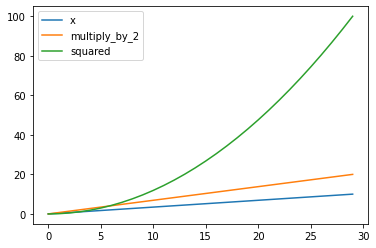

In [114]:
# import matplotlib.pyplot as plt
df.plot()
# plt.show()

<AxesSubplot:title={'center':'Grafikas'}>

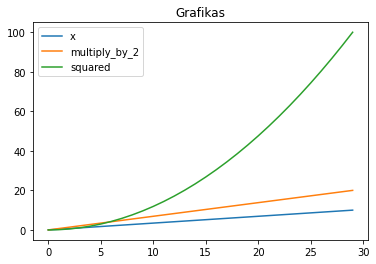

In [115]:
df.plot(title='Grafikas')

<AxesSubplot:title={'center':'Grafikas'}>

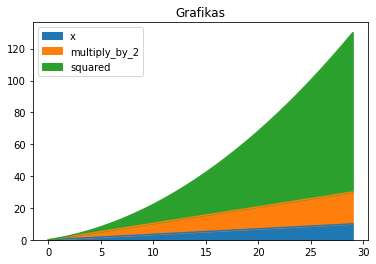

In [116]:
df.plot(title='Grafikas', kind='area')

<AxesSubplot:title={'center':'Grafikas'}>

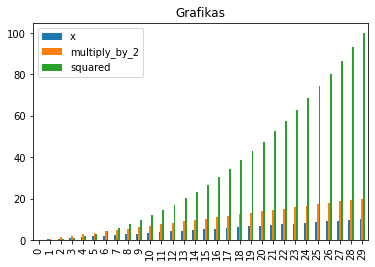

In [117]:
df.plot(title='Grafikas', kind='bar')

<AxesSubplot:xlabel='x', ylabel='squared'>

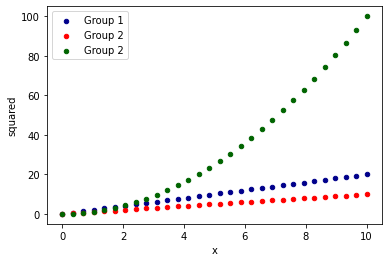

In [121]:
# df.plot(title='Grafikas', kind='scatter')
ax = df.plot.scatter(x="x", y="multiply_by_2", color="DarkBlue", label="Group 1")
df.plot.scatter(x="x", y="x", color="r", label="Group 2", ax=ax)
df.plot.scatter(x="x", y="squared", color="DarkGreen", label="Group 2", ax=ax)

## Matplotlib

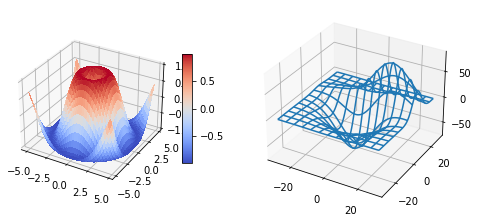

In [122]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

In [124]:
import matplotlib.pyplot as plt

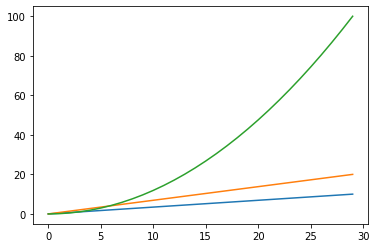

In [129]:
plt.plot(x)
plt.plot(y)
plt.plot(z)

<class 'matplotlib.axes._axes.Axes'>


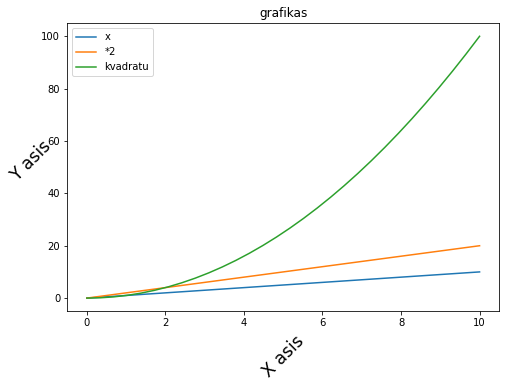

In [149]:
fig = plt.figure()
ax = fig.add_axes(rect=[0,0,1,1])
print (type(ax))

ax.plot(x, x, label='x')
ax.plot(x, y, label='*2')
ax.plot(x, z, label='kvadratu')
ax.set_title('grafikas')
ax.set_xlabel('X asis', fontsize='xx-large', rotation=45)
ax.set_ylabel('Y asis', fontsize='xx-large', rotation=45)
ax.legend()

In [139]:
x

array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

<class 'matplotlib.axes._axes.Axes'>


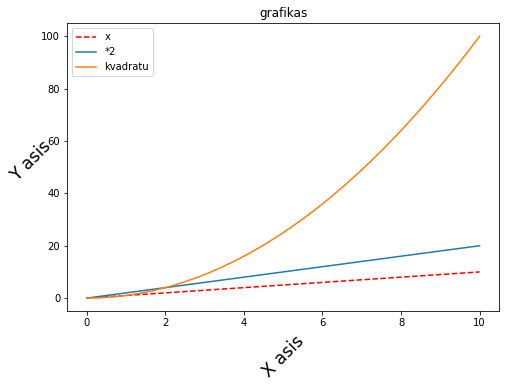

In [152]:
fig = plt.figure()
ax = fig.add_axes(rect=[0,0,1,1])
print (type(ax))

ax.plot(x, x, label='x', c='r', ls='--')
ax.plot(x, y, label='*2')
ax.plot(x, z, label='kvadratu')
ax.set_title('grafikas')
ax.set_xlabel('X asis', fontsize='xx-large', rotation=45)
ax.set_ylabel('Y asis', fontsize='xx-large', rotation=45)
ax.legend()

ValueError: cannot delete array elements

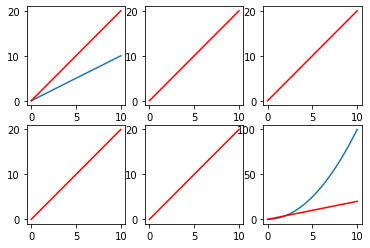

In [160]:
fig, axes = plt.subplots(2,3 )

axes[1, 2].plot(x, z)
axes[0, 0].plot(x, x)

for row in axes:
    for col_ax in row:
        col_ax.plot(x, y, c='r')



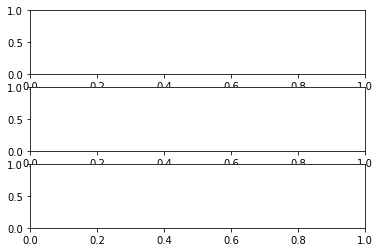

In [158]:
fig, axes = plt.subplots(3)

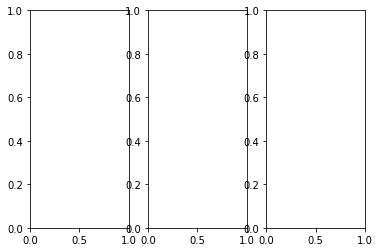

In [159]:
fig, axes = plt.subplots(1,3)

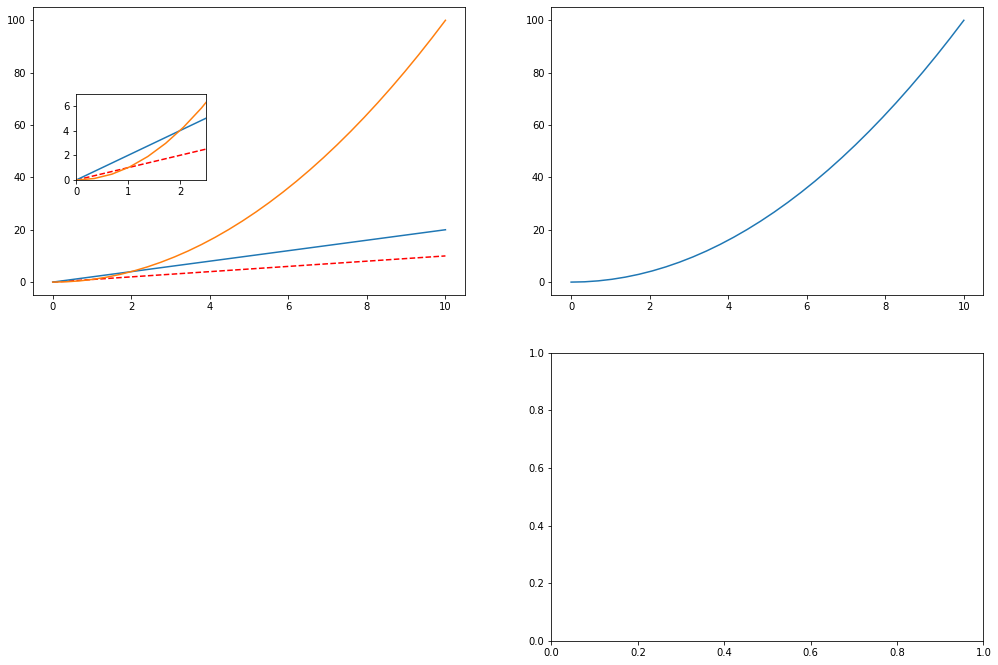

In [181]:
fig = plt.figure()
ax = fig.add_axes(rect=[0,0,1,1])
ax_zoom = fig.add_axes(rect=[0.1, 0.4, 0.3,0.3])

ax.plot(x, x, label='x', c='r', ls='--')
ax.plot(x, y, label='*2')
ax.plot(x, z, label='kvadratu')

ax_zoom.plot(x, x, label='x', c='r', ls='--')
ax_zoom.plot(x, y, label='*2')
ax_zoom.plot(x, z, label='kvadratu')
ax_zoom.set_xlim( [0,2.5] )
ax_zoom.set_ylim( [0,7] )

ax_2 = fig.add_axes(rect=[1.2, 0. ,1,1])
ax_2.plot(x,z)
ax_3 = fig.add_axes(rect=[1.2, -1.2 ,1,1])

fig.savefig('mano_grafikas.png', dpi=300)